### Initial Imports

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, gamma, lognorm, weibull_min, gaussian_kde, skew
import seaborn as sns
import copulas
from copulas.multivariate import GaussianMultivariate
from sklearn.preprocessing import QuantileTransformer

## Question 3

In [71]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


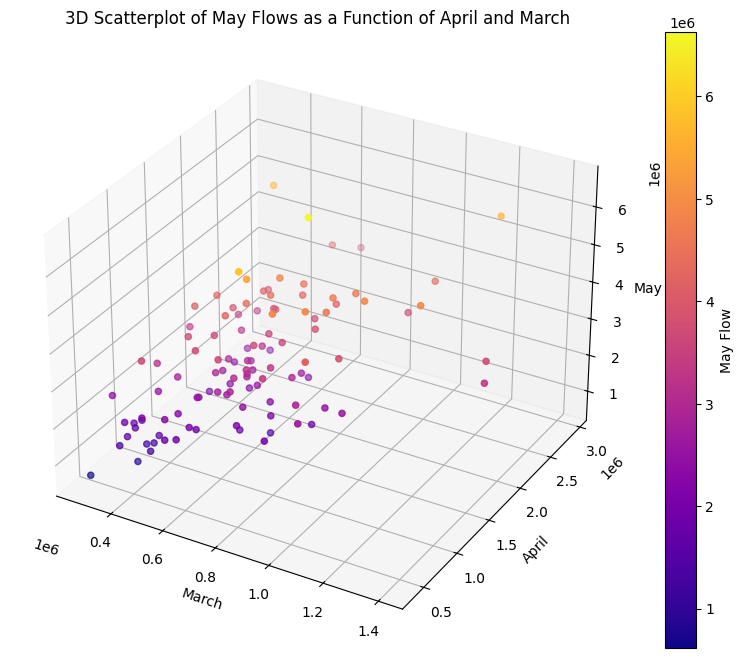

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(lee_ferry['Mar'], lee_ferry['Apr'], lee_ferry['May'], 
                     c=lee_ferry['May'], cmap='plasma')
fig.colorbar(scatter, label='May Flow')

ax.set_xlabel('March')
ax.set_ylabel('April')
ax.set_zlabel('May')

plt.title('3D Scatterplot of May Flows as a Function of April and March')
plt.show()

## Question 4

# May

In [73]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

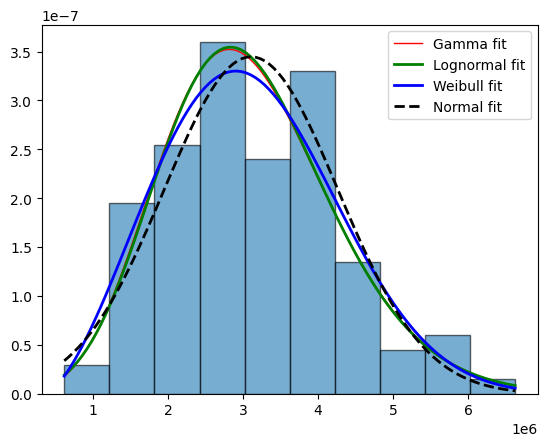

In [74]:
#May
# may = np.array(lee_ferry['May'])
# may_pandas = pd.DataFrame(lee_ferry['May'])


#normal
mean_n, std_n = norm.fit(may)
#gamma
g_fit = gamma.fit(may)
#lognormal
ln_fit = lognorm.fit(may)
#weibull
wb_fit = weibull_min.fit(may)


x = np.linspace(min(may), max(may), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

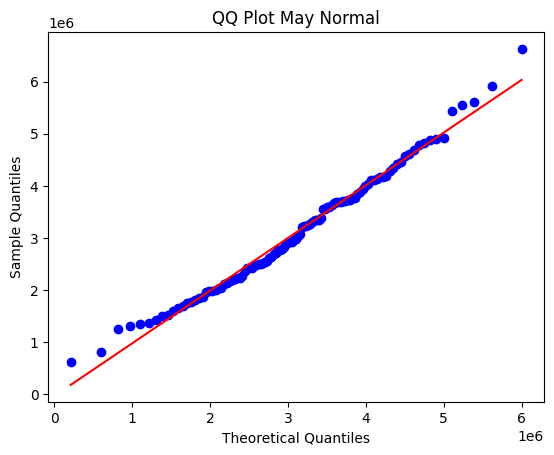

In [75]:
stats.probplot(may, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot May Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

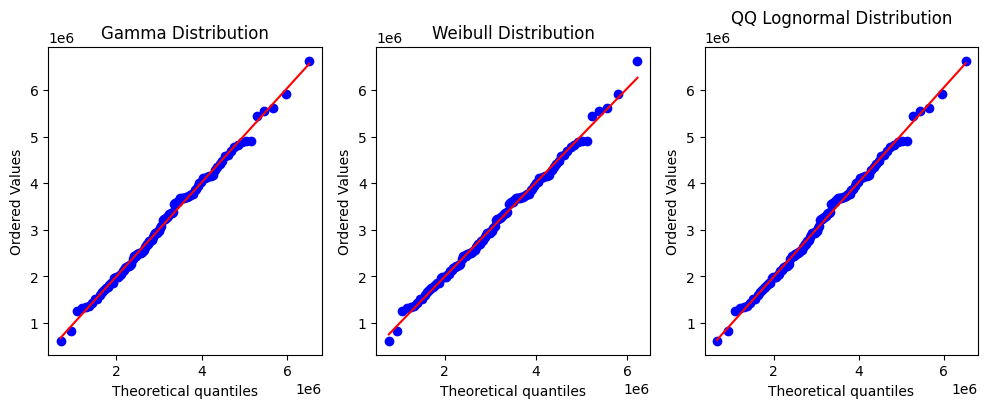

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(may, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(may, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(may, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [77]:
statistic, p_value = stats.kstest(may, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(may, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(may, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(may, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.06007286857476535
Normal P-value: 0.7952783900571778
Gamma K-S Statistic: 0.06541986067118755
Gamma P-value: 0.7040221058892594
Weibull K-S Statistic: 0.051319455258425295
Weibull P-value: 0.9172135633668114
Lognormal K-S Statistic: 0.0656601191463071
Lognormal P-value: 0.6997838322906176


Text(0.5, 1.0, 'May KDE Estimation')

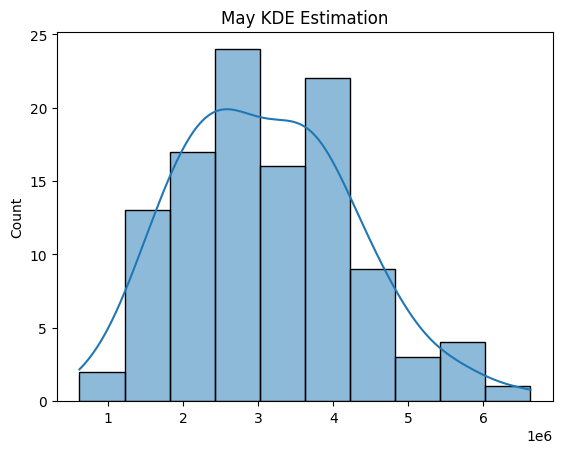

In [78]:
sns.histplot(data = may, kde=True)
plt.title('May KDE Estimation')

## Aug

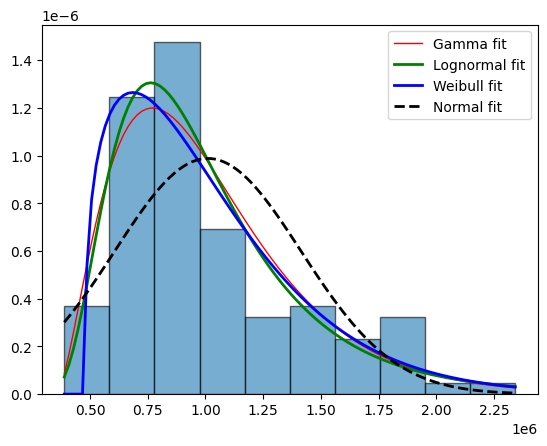

In [79]:
##Aug
Aug = np.array(lee_ferry['Aug'])
#normal
mean_n, std_n = norm.fit(Aug)
#gamma
g_fit = gamma.fit(Aug)
#lognormal
ln_fit = lognorm.fit(Aug)
#weibull
wb_fit = weibull_min.fit(Aug)

x = np.linspace(min(Aug), max(Aug), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Aug, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

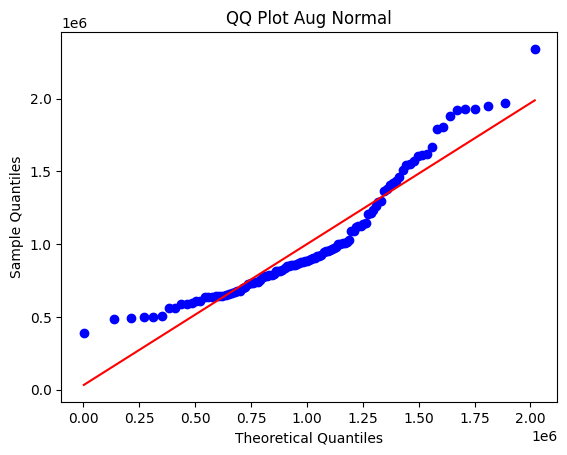

In [80]:
stats.probplot(Aug, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

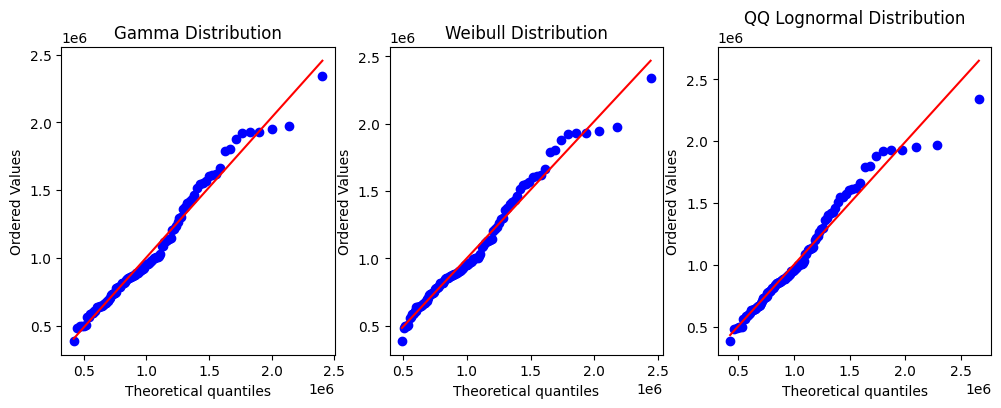

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Aug, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Aug, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Aug, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [82]:
statistic, p_value = stats.kstest(Aug, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Aug, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Aug, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Aug, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.1623153538906797
Normal P-value: 0.0050540268644102505
Gamma K-S Statistic: 0.08203681345518143
Gamma P-value: 0.4213310485865376
Weibull K-S Statistic: 0.07332568706302134
Weibull P-value: 0.5641620179826017
Lognormal K-S Statistic: 0.0634161265536094
Lognormal P-value: 0.7390286494767206


Text(0.5, 1.0, 'Aug KDE Estimation')

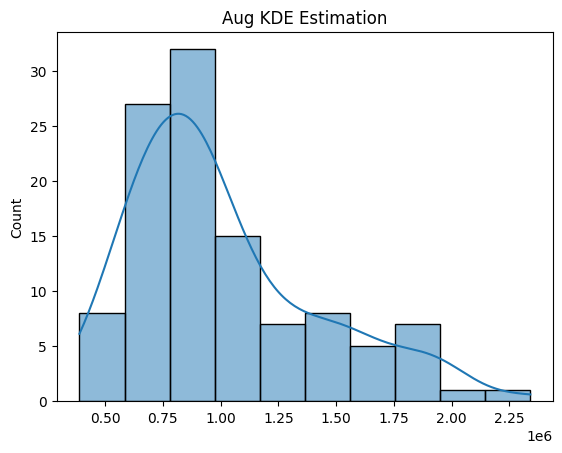

In [83]:
sns.histplot(data = Aug, kde=True)
plt.title('Aug KDE Estimation')

## Dec

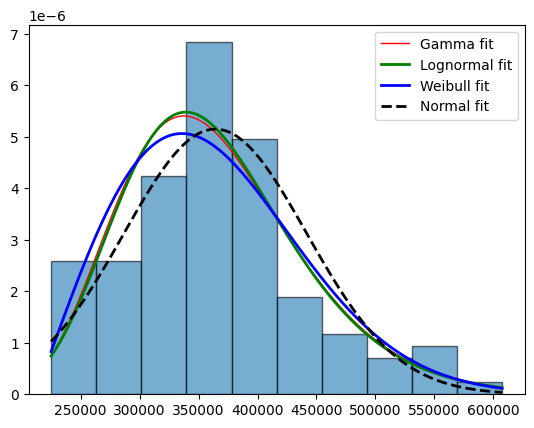

In [84]:
#Dec
Dec = np.array(lee_ferry['Dec'])
#normal
mean_n, std_n = norm.fit(Dec)
#gamma
g_fit = gamma.fit(Dec)
#lognormal
ln_fit = lognorm.fit(Dec)
#weibull
wb_fit = weibull_min.fit(Dec)

x = np.linspace(min(Dec), max(Dec), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Dec, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

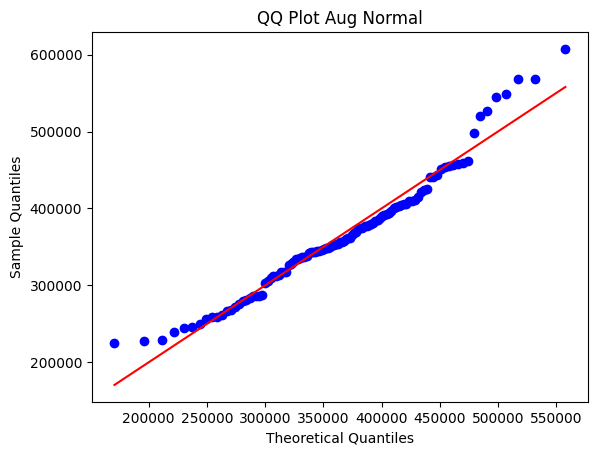

In [85]:
stats.probplot(Dec, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

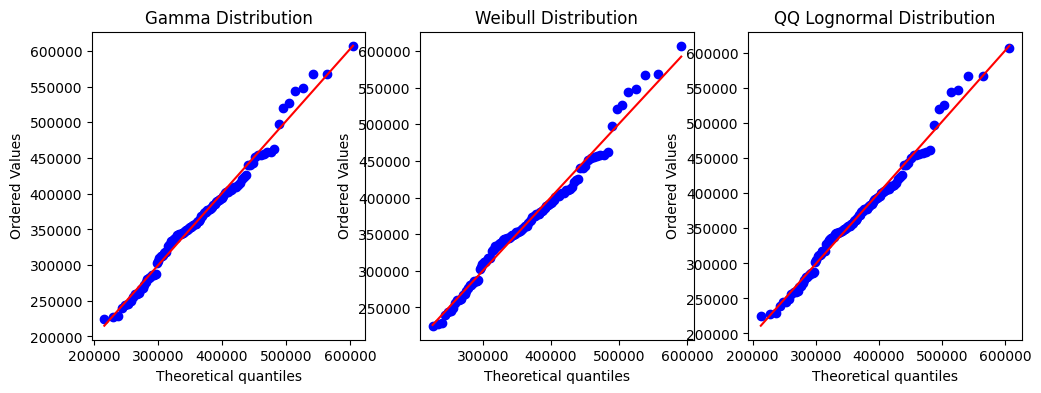

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Dec, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Dec, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Dec, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [87]:
statistic, p_value = stats.kstest(Dec, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print("Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Dec, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Dec, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Dec, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.07232808930305501
Normal P-value: {p_value}
Gamma K-S Statistic: 0.07770585501742899
Gamma P-value: 0.489934874735357
Weibull K-S Statistic: 0.08447837182427537
Weibull P-value: 0.3851882800457106
Lognormal K-S Statistic: 0.07441616172683779
Lognormal P-value: 0.5453134485209159


Text(0.5, 1.0, 'Dec KDE Estimation')

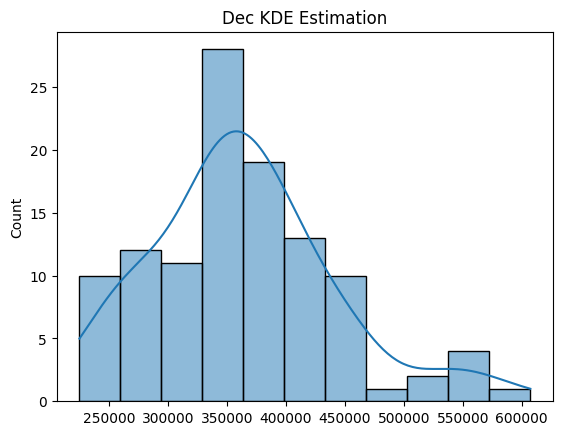

In [88]:
sns.histplot(data = Dec, kde=True)
plt.title('Dec KDE Estimation')

### Question 5

In [89]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

In [90]:
shape, loc, scale = gamma.fit(may) #get the fit 
N = 500
gamma_mc = np.random.gamma(shape, scale, N) #use the parameters to generate gamma monte carlo samples 
gamma_mc.shape

(500,)

In [91]:
mean = shape * scale 
variance = shape * scale**2
sd= np.sqrt(variance)
skewness = skew(gamma_mc)
iqr = np.percentile(gamma_mc, 75) - np.percentile(gamma_mc, 25) 
median = np.median(gamma_mc)


Text(1.05, 5332969.651788388, 'iqr:  1512222.99')

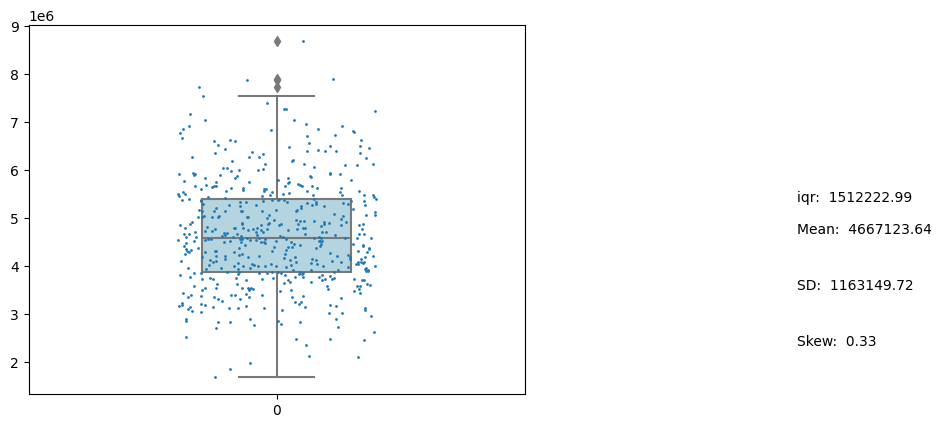

In [92]:
sns.boxplot(data=gamma_mc, color='lightblue', width = 0.3)
sns.stripplot(data=gamma_mc, size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')


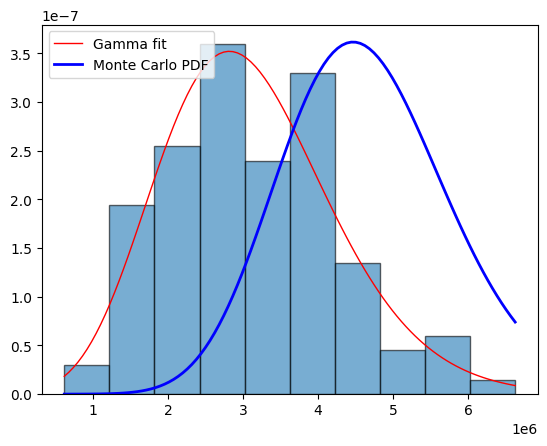

In [93]:
#gamma
g_fit2 = gamma.fit(may)
g_fit3 = gamma.fit(gamma_mc)


x = np.linspace(min(may), max(may), 100) 
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit2), 'r-', lw=1, label="Gamma fit")
plt.plot(x, gamma.pdf(x, *g_fit3), 'b-', lw=2, label ='Monte Carlo PDF')

plt.legend()
plt.show()

### Problem 6

In [94]:
def bootstrap(data, num_samples):
    bootstraped_data = []
    for _ in range(num_samples): #does it num_samples amount of time 
        boot_sample = np.random.choice(data, replace=True) #resamples the data with replacement 
        bootstraped_data.append(boot_sample)
    return np.array(bootstraped_data)

data = may 
num_samples = 500
boot_data = bootstrap(may, num_samples)
boot_data

array([2547942, 2483329, 3270773, 3844250, 2642353, 6628365, 4874849,
       1422316, 4911189, 3231443, 4575588, 3270773, 1695847, 2133211,
       1246368, 1695847, 1804002, 2032109, 3686355, 4162824, 2924637,
       3585225, 5917499, 3635101, 3844250, 1246368, 4821916, 4821916,
       2559692, 4904073, 1362700, 1804002, 3702789, 3270773, 4411471,
       2239709, 4180109, 2932034, 1362700, 4348392, 2559692, 1993763,
       3351494, 4162824, 2932034, 3236583, 3231443, 1804002, 2427137,
       2267512, 2690228, 3255617, 5917499, 2211325, 3079161, 4348392,
       4575588, 2483874, 1509729, 4911189, 1342116, 3236583, 2175686,
       3384372, 1695847, 1595614, 3351494, 4780048, 3040039, 4575588,
       2427137, 5606346, 3079161, 5917499, 3564293, 2559692, 2702179,
       4162824, 4029114, 2495467, 2175686, 4780048, 2780986, 3676415,
       2430315, 2497785, 2239709, 5606346, 2975185, 2889416, 1743460,
        820372, 2039820, 1982707,  820372, 2430315, 4465792, 4111052,
       2427137, 4348

In [95]:
mean = np.mean(boot_data)
print('Boot Data Mean is:', mean)
# Standard Deviation
std_dev = np.std(boot_data)
print(f"Standard Deviation: {std_dev:.2f}")

# Skew
skewness = stats.skew(boot_data)
print(f"Skewness: {skewness:.2f}")

# IQR
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
print(f"Interquartile Range (IQR): {iqr:.2f}")

Boot Data Mean is: 3160280.816
Standard Deviation: 1225874.76
Skewness: 0.37
Interquartile Range (IQR): 1586543.50


Text(1.05, 5370129.909083368, 'iqr:  1586543.50')

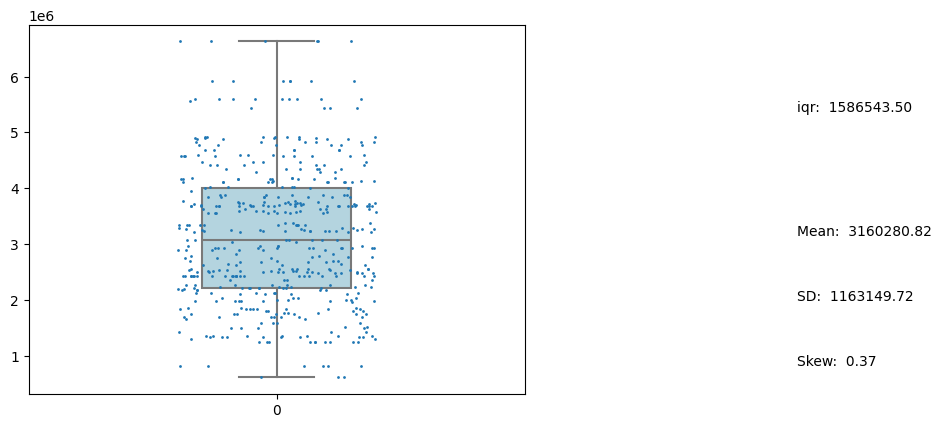

In [96]:
sns.boxplot(data=boot_data, color='lightblue', width = 0.3)
sns.stripplot(data=boot_data, size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')


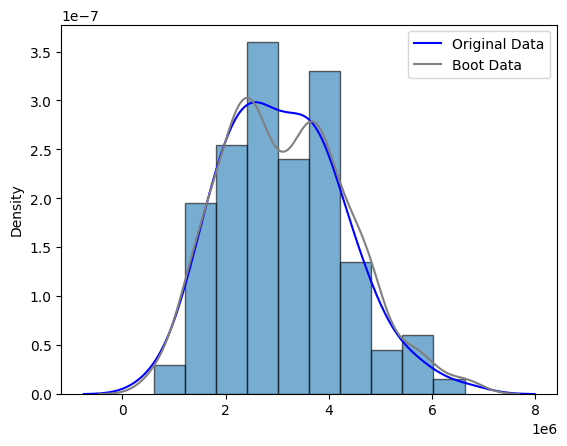

In [97]:
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(may, color='blue', label='Original Data')
sns.kdeplot(boot_data, color='grey', alpha=1, label = 'Boot Data')
plt.legend()

### Problem 7

In [98]:
apr_may_df =lee_ferry[['Apr', 'May']]
apr_may = np.array(apr_may_df)
apr_may

array([[1204640, 3635101],
       [1465838, 2702179],
       [1041224, 1595614],
       [1120492, 3349297],
       [1730475, 3298793],
       [ 951815, 2924637],
       [ 902408, 3684152],
       [1829662, 3270773],
       [1593815, 4685651],
       [1483872, 2427137],
       [1802735, 3736188],
       [1545288, 3763312],
       [ 901047, 2760606],
       [1414719, 3231443],
       [ 983984, 5917499],
       [ 930238, 4180109],
       [1224473, 4874849],
       [1296746, 4029114],
       [1658525, 3384372],
       [1469823, 2624348],
       [1722211, 3686355],
       [1369061, 4348392],
       [1103775, 4821916],
       [1774777, 4602167],
       [1862406, 2225165],
       [ 712221, 1515196],
       [1774718, 4465792],
       [ 579969, 1743460],
       [ 584844, 1509729],
       [ 703982, 1659496],
       [1465536, 4139077],
       [1594216, 3944714],
       [1725164, 3725399],
       [1250651, 2975185],
       [ 780974, 2559692],
       [1151420, 5436441],
       [2925816, 3586298],
 

#### Part A: Fit a Copula and Show the Bivariate Plot Along with the Data

In [99]:
scaler = QuantileTransformer()
transformed = scaler.fit_transform(apr_may)
copula = GaussianMultivariate()
copula.fit(transformed)

/home/anna/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (111). n_quantiles is set to n_samples.
  warnings.warn(
/home/anna/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/home/anna/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [100]:
x_grid = np.linspace(0, 1, 100)
y_grid = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_grid, y_grid)
grid_points = np.column_stack([X.ravel(), Y.ravel()])


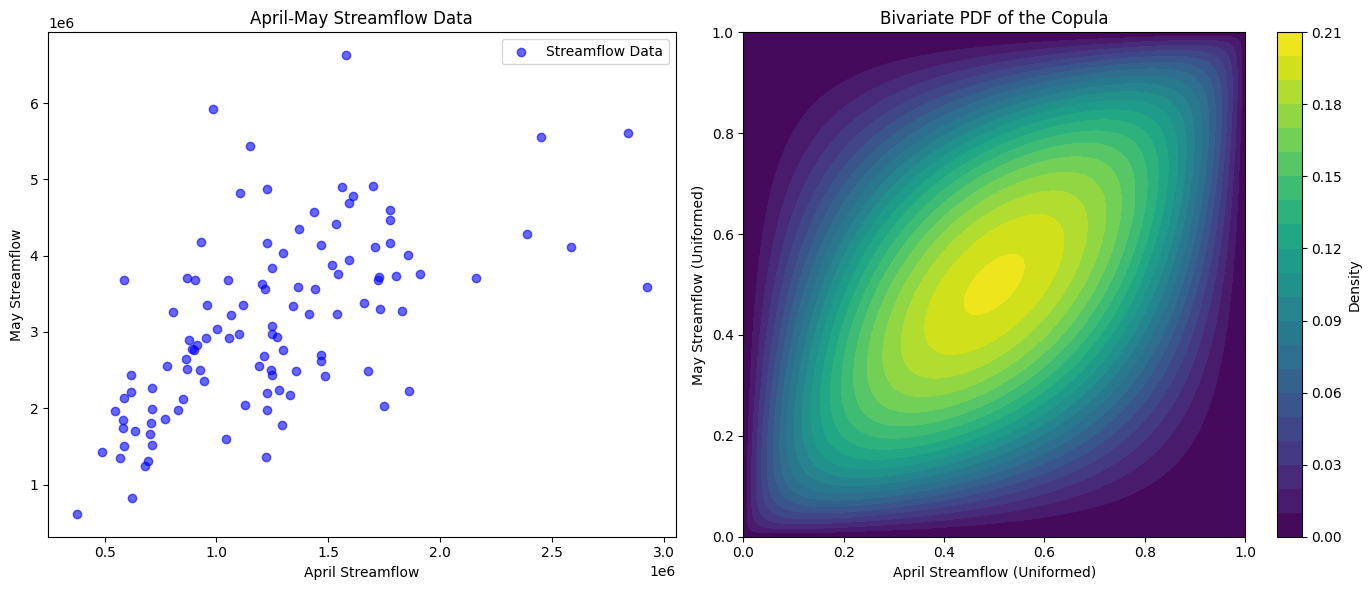

In [101]:
pdf_values = copula.pdf(grid_points).reshape(X.shape)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(apr_may_df['Apr'].values, apr_may_df['May'].values,  color='blue', alpha=0.6, label='Streamflow Data')
axes[0].set_title("April-May Streamflow Data")
axes[0].set_xlabel("April Streamflow")
axes[0].set_ylabel("May Streamflow")
axes[0].legend()

cp = axes[1].contourf(X, Y, pdf_values, cmap='viridis', levels=20)
axes[1].set_title("Bivariate PDF of the Copula")
axes[1].set_xlabel("April Streamflow (Uniformed)")
axes[1].set_ylabel("May Streamflow (Uniformed)")
fig.colorbar(cp, ax=axes[1], label="Density")
plt.tight_layout()
plt.show()

#### Part B: Generate 500 Samples, Boxplot the statistics and PDF's from the simluations along with that of the historic data for April and May Flow

Copula Samples Mean is: 1228106.746471815
Copula STD is 461856.5811785504
Skewness 0.8120266668570167
Interquartile Range (IQR): 635144.9917094487


Text(0.5, 4894430.654938092, 'iqr:  635144.99')

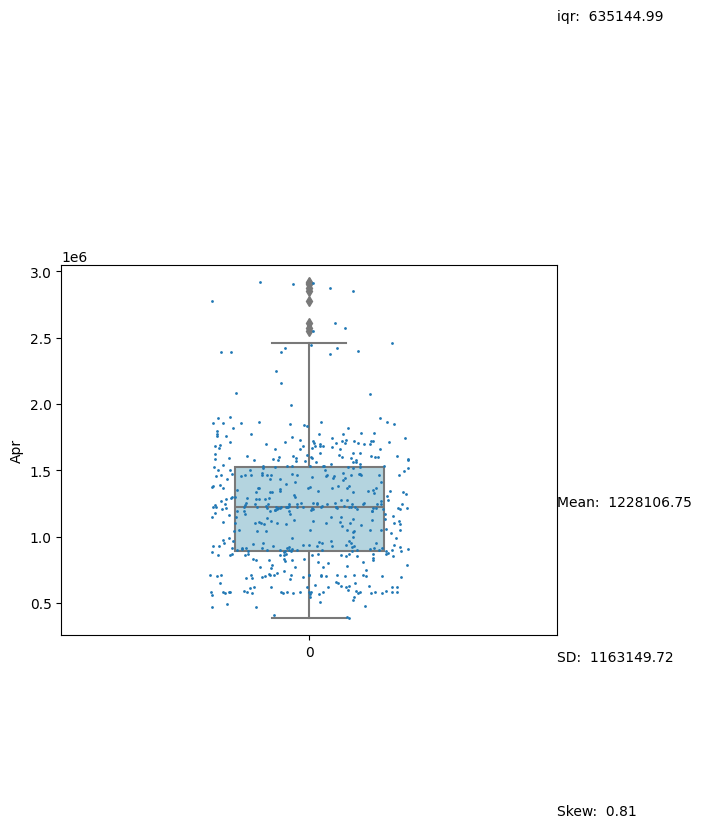

In [122]:
generated_samples = copula.sample(500)
generated_data = scaler.inverse_transform(generated_samples)
generated_data_df = pd.DataFrame(generated_data)
generated_data_df.columns= ['Apr', 'May']
generated_data_df


mean = np.mean(generated_data_df['Apr'])
print('Copula Samples Mean is:', mean)
# Standard Deviation
std_dev = np.std(generated_data_df['Apr'])
print('Copula STD is', std_dev)

# Skew
skewness = stats.skew(generated_data_df['Apr'])
print('Skewness', skewness)

# IQR
q75, q25 = np.percentile(generated_data_df['Apr'], [75, 25])
iqr = q75 - q25
print('Interquartile Range (IQR):', iqr)

sns.boxplot(data=generated_data_df['Apr'], color='lightblue', width = 0.3)
sns.stripplot(data=generated_data_df['Apr'], size=2, jitter = 0.2)
plt.text(0.5, mean, f'Mean: {mean: .2f}') #mean 
plt.text(0.5, mean - sd, f'SD: {sd: .2f}')
plt.text(0.5, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(0.5, iqr / 2 + median, f'iqr: {iqr: .2f}')

Copula Samples Mean is: 3160996.588168787
Copula STD is 1161012.0941413345
Skewness 0.3467215258028113
Interquartile Range (IQR): 1642099.8525885842


Text(1.05, 5397908.085377661, 'iqr:  1642099.85')

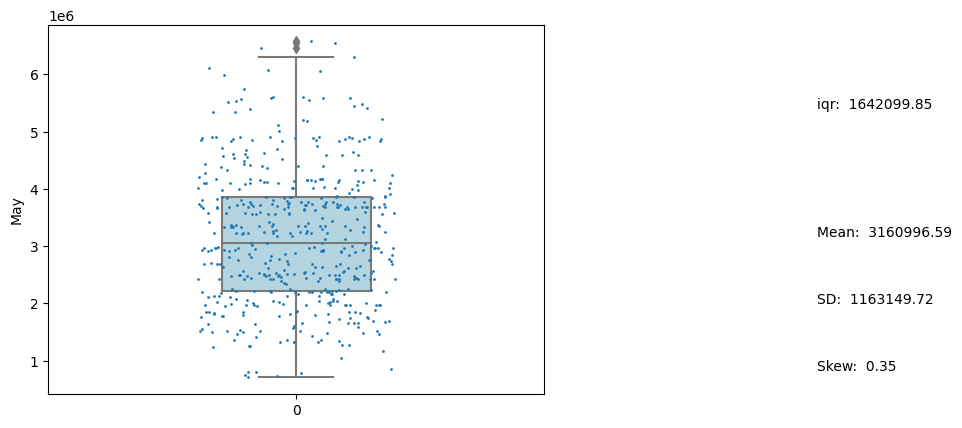

In [120]:
mean = np.mean(generated_data_df['May'])
print('Copula Samples Mean is:', mean)
# Standard Deviation
std_dev = np.std(generated_data_df['May'])
print('Copula STD is', std_dev)

# Skew
skewness = stats.skew(generated_data_df['May'])
print('Skewness', skewness)

# IQR
q75, q25 = np.percentile(generated_data_df['May'], [75, 25])
iqr = q75 - q25
print('Interquartile Range (IQR):', iqr)

sns.boxplot(data=generated_data_df['May'], color='lightblue', width = 0.3)
sns.stripplot(data=generated_data_df['May'], size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')

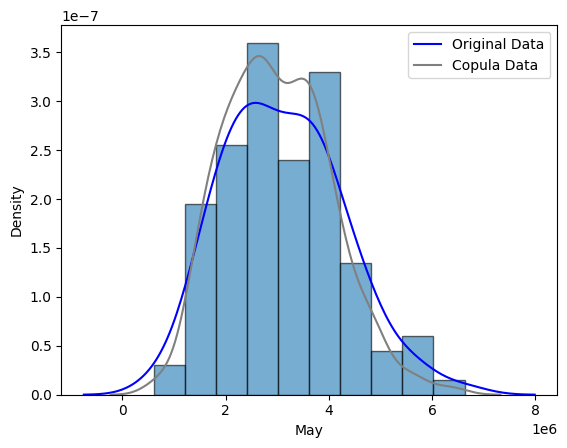

In [127]:
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(may, color='blue', label='Original Data')
sns.kdeplot(data=generated_data_df['May'], color='grey', alpha=1, label = 'Copula Data')
plt.legend()



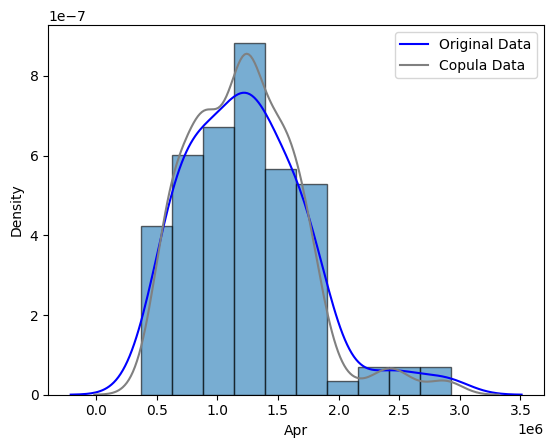

In [129]:
apr = lee_ferry['Apr']
plt.hist(apr, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(apr, color='blue', label='Original Data')
sns.kdeplot(generated_data_df['Apr'], color='grey', alpha=1, label = 'Copula Data')
plt.legend()

#### Problem 8

In [154]:
chippewa = pd.read_excel('/home/anna/Desktop/Engineering-Probability---Statistics/Chippewa River StreamFlow Data.xls')
chippewa = chippewa.set_index('Year')
chippewa = chippewa.iloc[:111]
chippewa

,Date,Gauge Height,StreamFlow
Year,,,
1914,1914-04-30,,8720.0
1915,1915-05-18,,6000.0
1916,1916-04-22,,13600.0
1917,1917-04-21,,7240.0
1918,1918-06-02,,9520.0
...,...,...,...
2020,2020-03-30,11.35,11800.0
2021,2021-05-22,7.112,5980.0
2022,2022-04-14,9.1,8570.0


#### A) Gumbel EV-1 Distribution

In [159]:
#Models the maximum or minumum of a number of a number of samples 
def gumbel_ev1(data, return_periods):
    mu = np.mean(data)
    s = np.std(data)
    y = -np.log(-np.log(1 - 1/return_periods))
    alpha = np.sqrt(6) / np.pi / s 
    u = mu - 0.5772 / alpha
    return u + y / alpha

result = gumbel_ev1(chippewa['StreamFlow'].values, 100)
result

34887.632157671374